In [20]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import pandas as pd
from os.path import abspath

import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv(abspath('../../../data/MSFT/MSFT-5-Year.csv'), index_col=0, parse_dates=['Date'])
df = df.filter(['Date', 'Open'])
print(df.shape)
df.head()

(1245, 1)


,Open
Date,
2017-03-01,64.129997
2017-03-02,64.690002
2017-03-03,63.990002
2017-03-06,63.970001
2017-03-07,64.190002


In [23]:
# Split the df into a training set and a test set
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_set, test_set = train_test_split(df, test_size=0.25, shuffle=False)

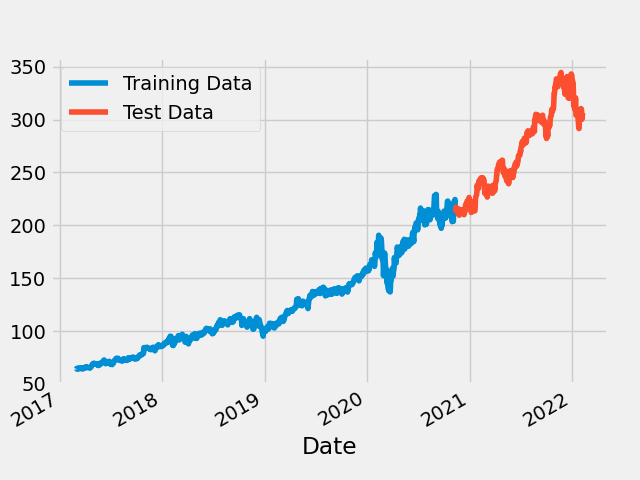

In [24]:
# Plot the training and testing data
train_set.Open.plot(label='Training Data')
test_set.Open.plot(label='Test Data')
plt.legend()

In [25]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler()
train_scaled = transformer.fit_transform(train_set)

In [26]:
import numpy as np

x_train = []
y_train = []

for i in range(60,len(train_scaled)):
    x_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(873, 60)


In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train.shape)

(873, 60, 1)


In [28]:
print(test_set.shape)

(312, 1)


In [29]:
import tensorflow as tf

#List attached GPU devices
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

model = Sequential()
model.add(LSTM(units=256, return_sequences=True, input_shape=(x_train.shape[1],1))) 
model.add(LSTM(units=128, return_sequences=True))
model.add(LSTM(units=64, return_sequences=True))
model.add(LSTM(units=32, return_sequences=True))
model.add(LSTM(units=16))
model.add(Dropout(0.1))
model.add(Dense(units=1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 256)           264192    
                                                                 
 lstm_1 (LSTM)               (None, 60, 128)           197120    
                                                                 
 lstm_2 (LSTM)               (None, 60, 64)            49408     
                                                                 
 lstm_3 (LSTM)               (None, 60, 32)            12416     
                                                                 
 lstm_4 (LSTM)               (None, 16)                3136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 1

In [31]:
# Create an EarlyStopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [32]:
model.compile(optimizer='adadelta', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=10, batch_size=32, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/10


2022-02-22 10:21:44.228578: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:45.732085: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:45.983086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:46.271730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:46.625348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:46.935826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:21:47.555137: I tensorflow/core/grappler/optimizers/cust

25/25 [==============================] - ETA: 0s - loss: 0.1474

2022-02-22 10:22:10.291448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:22:10.784869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:22:11.016648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:22:11.295623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:22:11.588775: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:22:11.844985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


25/25 [==============================] - 36s 963ms/step - loss: 0.1474 - val_loss: 0.7938
Epoch 2/10
25/25 [==============================] - 18s 737ms/step - loss: 0.1473 - val_loss: 0.7934
Epoch 3/10
25/25 [==============================] - 18s 737ms/step - loss: 0.1472 - val_loss: 0.7931
Epoch 4/10
25/25 [==============================] - 18s 739ms/step - loss: 0.1471 - val_loss: 0.7927
Epoch 5/10
25/25 [==============================] - 18s 740ms/step - loss: 0.1470 - val_loss: 0.7924
Epoch 6/10
25/25 [==============================] - 18s 738ms/step - loss: 0.1468 - val_loss: 0.7920
Epoch 7/10
25/25 [==============================] - 18s 740ms/step - loss: 0.1467 - val_loss: 0.7916
Epoch 8/10
25/25 [==============================] - 18s 740ms/step - loss: 0.1466 - val_loss: 0.7912
Epoch 9/10
25/25 [==============================] - 18s 738ms/step - loss: 0.1465 - val_loss: 0.7908
Epoch 10/10
25/25 [==============================] - 18s 738ms/step - loss: 0.1462 - val_loss: 0.7904


In [33]:
model.save('/Users/aditya/Programming/stock-market-predictions/stock_market_predictions/forecasting/LSTM/MSFT-5-Year-LSTM.h5')

In [34]:
# from keras.models import load_model

# model = load_model('/Users/aditya/Programming/stock-market-predictions/stock_market_predictions/forecasting/LSTM/MSFT-5-Year-LSTM.h5')

In [35]:
print(df.shape)

inputs = df[len(df)-len(test_set)-60 : ].values
print(inputs.shape)
inputs = inputs.reshape(-1,1)
print(inputs.shape)
inputs = transformer.transform(inputs)
print(inputs.shape)

(1245, 1)
(372, 1)
(372, 1)
(372, 1)


In [36]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

(312, 60, 1)


In [37]:
predicted = model.predict(x_test)
print(predicted.shape)
# predicted = np.reshape(predicted, (predicted.shape[0], 1))
# predicted = transformer.inverse_transform(predicted)

2022-02-22 10:25:02.343431: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:25:02.931947: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:25:03.161780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:25:03.450330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:25:03.733199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-02-22 10:25:03.987048: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(312, 1)


In [38]:
# predicted = np.reshape(predicted, (predicted.shape[0], 1))
predicted = transformer.inverse_transform(predicted)

In [39]:
print(predicted.shape)

# Convert the predicted values to a dataframe
predicted_df = pd.DataFrame(predicted)

# Rename the column to "Open"
predicted_df.columns = ['Open']

# Add a new column called "Date" that has the same index as the other dataframe
predicted_df['Date'] = df[len(df)-len(test_set)-0 : ].index

# Set the 'Date' column as the index
predicted_df = predicted_df.set_index('Date')

predicted_df.head()

(312, 1)


,Open
Date,
2020-11-11,64.579636
2020-11-12,64.583458
2020-11-13,64.585686
2020-11-16,64.587006
2020-11-17,64.587387


<AxesSubplot:xlabel='Date'>

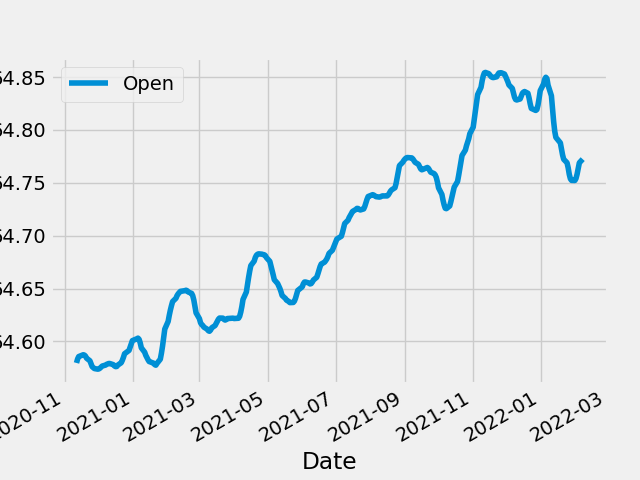

In [40]:
# Plot the predicted values
predicted_df.plot(label='Predicted')


In [41]:
def plot_predictions(test, predicted):
    plt.figure(4, figsize=(10,6))
    plt.plot(test, color="red", label="real MSFT stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title("MSFT stock price prediction")
    plt.xlabel("time")
    plt.ylabel("MSFT stock price")
    plt.legend()
    plt.show()

In [42]:
import math
from sklearn.metrics import mean_squared_error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error is : {}.".format(rmse))

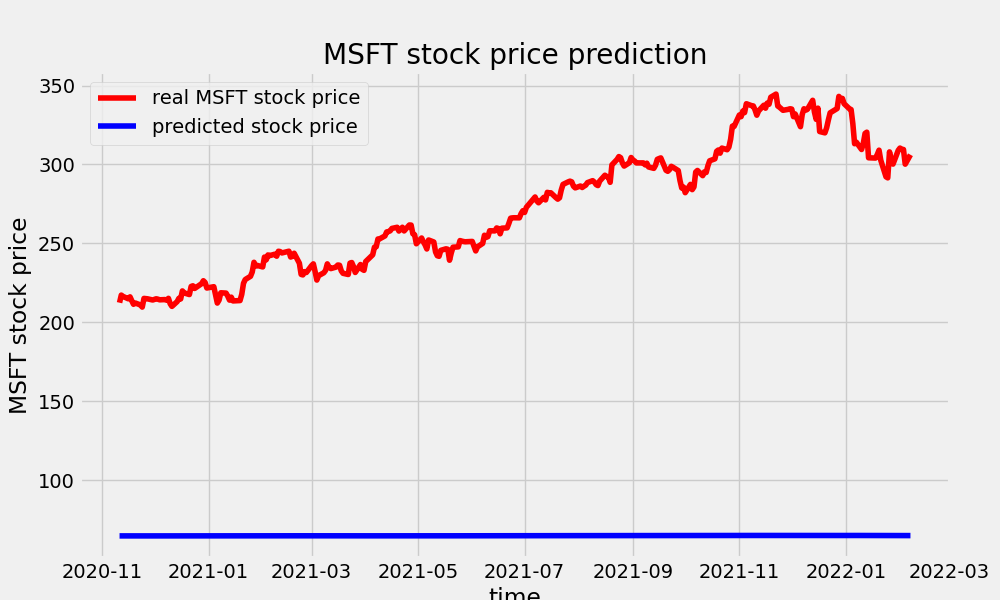

In [43]:
plot_predictions(test_set, predicted_df)

In [44]:
return_rmse(test_set, predicted)

the root mean squared error is : 210.83016331015114.
